# 10 minutes to pandas
* 公式サイト参照: http://pandas.pydata.org/pandas-docs/stable/10min.html
* バージョン: 0.23.3

### 1. インストール
* ※Beutifulsoup4をインストールしている場合は、`lxml`か`html5lib`をインストールする必要がある。`read_html()`が機能しなくなる。

### 2. インポート

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 3. オブジェクトの作成
* `Series`オブジェクト…一次元の配列
* `DataFrame`オブジェクト…二次元、サイズ可変、異質な表形式のデータ構造。ラベルとなるrowとcolumnを持つ(行と列)。辞書に似た構造

In [2]:
#Seriesオブジェクト
s = pd.Series([1,3,5,np.nan,6,8])  #np.nanはリストの欠損値を指す
print(type(s))
s

<class 'pandas.core.series.Series'>


0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [3]:
#DataFrameオブジェクト
#datetimeのrowとラベルづけされたcolumnを持つデータ構造
dates = pd.date_range('20130101', periods=6)  #date_range()…固定されたインデックスを返す
#datesの格納内容 -> DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04', '2013-01-05', '2013-01-06'], dtype='datetime64[ns]', freq='D')
df =pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))  #np.random.randn()…標準正規分布に沿ってランダムな値を生成
print(type(df))
df

<class 'pandas.core.frame.DataFrame'>


,A,B,C,D
2013-01-01,0.640245,0.221888,0.161165,-0.158784
2013-01-02,-0.842354,-1.756285,-0.629484,-1.589416
2013-01-03,-0.298022,-0.768641,-0.613439,-0.665621
2013-01-04,-1.984155,0.740455,-0.928366,-0.510639
2013-01-05,-1.918457,-0.258365,-1.469069,2.910253
2013-01-06,0.163206,-0.202259,0.119820,0.606145


In [4]:
#DataFrameオブジェクト(Series型にも変換できるdict型を使った場合)
df2 = pd.DataFrame({'A' : 1.,
                    'B' : pd.Timestamp('20130102'),  #pandas.Timestamp()…pandas用のタイムスタンンプ生成
                    'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                    'D' : np.array([3] * 4,dtype='int32'),  #numpy.array()…一次元配列の作成
                    'E' : pd.Categorical(["test","train","test","train"]),  #pandas.Categorical()…変数を表すメソッド
                    'F' : 'foo' })
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


### 4. データを見る

In [5]:
df.head(2)  #DataFrame.head(n)…最初からn列目までのデータを表示

,A,B,C,D
2013-01-01,0.640245,0.221888,0.161165,-0.158784
2013-01-02,-0.842354,-1.756285,-0.629484,-1.589416


In [6]:
df.tail(3)  #DataFrame.tail(n)…最後からn列目までのデータを表示

,A,B,C,D
2013-01-04,-1.984155,0.740455,-0.928366,-0.510639
2013-01-05,-1.918457,-0.258365,-1.469069,2.910253
2013-01-06,0.163206,-0.202259,0.119820,0.606145


In [7]:
df.index  #DataFrame.index…インデックス値を表示

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [8]:
df.columns  #DataFrame.columns…カラム値を表示

Index(['A', 'B', 'C', 'D'], dtype='object')

In [9]:
df.values  #DataFrame.values…バリューをリスト(カラム単位)で返す

array([[ 0.64024466,  0.22188846,  0.1611652 , -0.15878385],
       [-0.84235402, -1.75628475, -0.62948437, -1.58941564],
       [-0.29802182, -0.76864116, -0.61343897, -0.66562134],
       [-1.98415456,  0.74045532, -0.92836589, -0.51063921],
       [-1.91845718, -0.25836465, -1.46906898,  2.91025334],
       [ 0.1632055 , -0.20225916,  0.11981968,  0.60614479]])

In [10]:
df.describe()  #データの統計サマリーを返す

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.706590,-0.337201,-0.559896,0.098656
std,1.082281,0.860033,0.624823,1.551377
min,-1.984155,-1.756285,-1.469069,-1.589416
25%,-1.649431,-0.641072,-0.853646,-0.626876
50%,-0.570188,-0.230312,-0.621462,-0.334712
75%,0.047899,0.115852,-0.063495,0.414913
max,0.640245,0.740455,0.161165,2.910253


In [11]:
df.T  #データとカラムを入れ替える

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,0.640245,-0.842354,-0.298022,-1.984155,-1.918457,0.163206
B,0.221888,-1.756285,-0.768641,0.740455,-0.258365,-0.202259
C,0.161165,-0.629484,-0.613439,-0.928366,-1.469069,0.119820
D,-0.158784,-1.589416,-0.665621,-0.510639,2.910253,0.606145


In [69]:
df.sort_index(axis=1, ascending=False)  #インデックス値でソート

,D,C,B,A
2013-01-01,-0.599511,0.957986,0.708388,0.097818
2013-01-02,-1.759448,-2.720556,-1.510286,-1.258251
2013-01-03,-1.878780,0.950486,-0.608405,-3.717158
2013-01-04,-1.180491,-0.319094,1.011312,1.751371
2013-01-05,1.412786,-1.340268,0.934914,-0.023563
2013-01-06,0.393309,-1.009658,-0.489432,0.424970


In [13]:
df.sort_values(by="B")  #バリュー値でソート

,A,B,C,D
2013-01-02,-0.842354,-1.756285,-0.629484,-1.589416
2013-01-03,-0.298022,-0.768641,-0.613439,-0.665621
2013-01-05,-1.918457,-0.258365,-1.469069,2.910253
2013-01-06,0.163206,-0.202259,0.119820,0.606145
2013-01-01,0.640245,0.221888,0.161165,-0.158784
2013-01-04,-1.984155,0.740455,-0.928366,-0.510639


### 5. セレクション

#### 5-1. データの取得

In [14]:
df['A']  #Aの取得。df.Aでも取得可能

2013-01-01    0.640245
2013-01-02   -0.842354
2013-01-03   -0.298022
2013-01-04   -1.984155
2013-01-05   -1.918457
2013-01-06    0.163206
Freq: D, Name: A, dtype: float64

In [15]:
df[1:4]  #スライスを用いた値の取得。df.head(),def.tail(n)と一部類似
#df["20130102":"20130104"]でも可

,A,B,C,D
2013-01-02,-0.842354,-1.756285,-0.629484,-1.589416
2013-01-03,-0.298022,-0.768641,-0.613439,-0.665621
2013-01-04,-1.984155,0.740455,-0.928366,-0.510639


#### 5-2. ラベルによるセレクション

In [16]:
df.loc[dates[0]]  #該当するインデックスラベルのカラムーバリューを取得。df.loc["20130101"]と同義

A    0.640245
B    0.221888
C    0.161165
D   -0.158784
Name: 2013-01-01 00:00:00, dtype: float64

In [17]:
df.loc[:,['A','B']]  #df.loc[:,'A':'B']と同義。注意点[コロンが必要]
#df.loc['20130101':'20130106',['A','B']]といった設定もできる

,A,B
2013-01-01,0.640245,0.221888
2013-01-02,-0.842354,-1.756285
2013-01-03,-0.298022,-0.768641
2013-01-04,-1.984155,0.740455
2013-01-05,-1.918457,-0.258365
2013-01-06,0.163206,-0.202259


In [18]:
df.at[dates[0],'A']  #単一のバリューを取得する場合。df.at["20130101","A"]と同義

0.6402446576728557

#### 5-3. ポジションによるセレクション

In [19]:
df.iloc[3]  #インデックスの順番に沿ったint型で取得するデータを指定できる。df.loc["20130104"]と同じ

A   -1.984155
B    0.740455
C   -0.928366
D   -0.510639
Name: 2013-01-04 00:00:00, dtype: float64

In [20]:
df.iloc[3:5,0:2]

,A,B
2013-01-04,-1.984155,0.740455
2013-01-05,-1.918457,-0.258365


In [21]:
df.iat[1,1]  #df.atのint版

-1.7562847477402643

#### 5-4. bool式

In [22]:
df[df.A > 0]  #条件を満たすバリューを返す

,A,B,C,D
2013-01-01,0.640245,0.221888,0.161165,-0.158784
2013-01-06,0.163206,-0.202259,0.119820,0.606145


In [23]:
df[df > 0]

,A,B,C,D
2013-01-01,0.640245,0.221888,0.161165,NaN
2013-01-02,NaN,NaN,NaN,NaN
2013-01-03,NaN,NaN,NaN,NaN
2013-01-04,NaN,0.740455,NaN,NaN
2013-01-05,NaN,NaN,NaN,2.910253
2013-01-06,0.163206,NaN,0.119820,0.606145


In [24]:
df2 = df.copy()  #DataFrameオブジェクトのコピーを作成
df2['E'] = ['one', 'one','two','three','four','three']
df2

,A,B,C,D,E
2013-01-01,0.640245,0.221888,0.161165,-0.158784,one
2013-01-02,-0.842354,-1.756285,-0.629484,-1.589416,one
2013-01-03,-0.298022,-0.768641,-0.613439,-0.665621,two
2013-01-04,-1.984155,0.740455,-0.928366,-0.510639,three
2013-01-05,-1.918457,-0.258365,-1.469069,2.910253,four
2013-01-06,0.163206,-0.202259,0.119820,0.606145,three


#### 5-5. セッティング

In [25]:
df['F'] = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102', periods=6))  #F行の指定
df.at[dates[0],'A'] = 0  #df["20130101","A"]のバリュー変更
df.iat[0,1] = 0  #df["20130101","B"]のバリュー変更
df.loc[:,'D'] = np.array([5] * len(df))  #D行のバリュー変更
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.161165,5,NaN
2013-01-02,-0.842354,-1.756285,-0.629484,5,1.0
2013-01-03,-0.298022,-0.768641,-0.613439,5,2.0
2013-01-04,-1.984155,0.740455,-0.928366,5,3.0
2013-01-05,-1.918457,-0.258365,-1.469069,5,4.0
2013-01-06,0.163206,-0.202259,0.119820,5,5.0


#### 5-6.欠損値
* pandasでは欠損値の表示にnp.nanが使用される。初期設定で計算に反映されないようになっている。

In [26]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])  #インデックスの再割り当て
df1.loc[dates[0]:dates[1],'E'] = 1  #E行の割り当て
df1
#下の表で欠損値がNaNで表示されているのがわかる

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.161165,5,NaN,1.0
2013-01-02,-0.842354,-1.756285,-0.629484,5,1.0,1.0
2013-01-03,-0.298022,-0.768641,-0.613439,5,2.0,NaN
2013-01-04,-1.984155,0.740455,-0.928366,5,3.0,NaN


In [27]:
df1.dropna(how='any')  #欠損値を除外

,A,B,C,D,F,E
2013-01-02,-0.842354,-1.756285,-0.629484,5,1.0,1.0


In [28]:
df1.fillna(value=5)  #欠損値を補充

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.161165,5,5.0,1.0
2013-01-02,-0.842354,-1.756285,-0.629484,5,1.0,1.0
2013-01-03,-0.298022,-0.768641,-0.613439,5,2.0,5.0
2013-01-04,-1.984155,0.740455,-0.928366,5,3.0,5.0


In [29]:
pd.isna(df1)  #欠損値の部分をFalse、欠損値でない部分をTrueで表し、欠損値を見つけ出すメソッド

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


### 6. オペレーション

#### 6-1. 統計
* 基本的に欠損値を除外して計算される

In [30]:
df.mean()  #平均を返す

A   -0.813297
B   -0.374182
C   -0.559896
D    5.000000
F    3.000000
dtype: float64

In [31]:
df.mean(1)  #カラムが軸

2013-01-01    1.290291
2013-01-02    0.554375
2013-01-03    1.063980
2013-01-04    1.165587
2013-01-05    1.070822
2013-01-06    2.016153
Freq: D, dtype: float64

In [32]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)  #nこ動かすメソッド
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [33]:
df.sub(s, axis='index')  #他の要素とデータフレームとの減算(df-s)

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-1.298022,-1.768641,-1.613439,4.0,1.0
2013-01-04,-4.984155,-2.259545,-3.928366,2.0,0.0
2013-01-05,-6.918457,-5.258365,-6.469069,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


#### 6-2. 適用
* データへの関数の適用

In [34]:
df.apply(np.cumsum)  #データに関数を通すメソッド(np.cumsum()は累積和を返すメソッド)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.161165,5,NaN
2013-01-02,-0.842354,-1.756285,-0.468319,10,1.0
2013-01-03,-1.140376,-2.524926,-1.081758,15,3.0
2013-01-04,-3.124530,-1.784471,-2.010124,20,6.0
2013-01-05,-5.042988,-2.042835,-3.479193,25,10.0
2013-01-06,-4.879782,-2.245094,-3.359373,30,15.0


In [35]:
df.apply(lambda x: x.max() - x.min())  #最大値ー最小値

A    2.147360
B    2.496740
C    1.630234
D    0.000000
F    4.000000
dtype: float64

#### 6-3. ヒストグラム

In [36]:
s = pd.Series(np.random.randint(0, 7, size=10)) #np.random.randint()…一様分布のランダムな整数を返す
s

0    3
1    4
2    1
3    3
4    4
5    0
6    5
7    0
8    6
9    2
dtype: int64

In [37]:
s.value_counts() #それぞれの出目ごとにでた個数を返す

4    2
3    2
0    2
6    1
5    1
2    1
1    1
dtype: int64

#### 6-4. 文字列メソッド
* Seriesオブジェクトは文字列を取り扱うメソッド,strメソッドを持っている

In [38]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s.str.lower()  #小文字に統一するメソッド

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

### 7. マージ

#### 7-1. 連結
* pandasは、Series,DataFrame,Panelオブジェクトを簡単に結合させる様々な関数を持っている
* `Panel`…三次元配列を表すオブジェクト

In [39]:
df = pd.DataFrame(np.random.randn(10, 4))  #DataFrameオブジェクトの生成
pieces = [df[:3], df[3:7], df[7:]]   #バリューの分割
pd.concat(pieces)  #valueの結合

,0,1,2,3
0,0.890756,0.901530,-0.765555,1.050202
1,-0.271121,0.593950,1.824453,0.614195
2,0.952880,1.262962,0.619088,0.786609
3,-1.242715,-0.259757,-0.441338,0.073672
4,-1.943991,-0.156803,0.008432,-2.172710
5,0.941596,1.562745,-0.236899,0.885822
6,-0.881871,-1.691723,0.720165,0.041064
7,-2.468225,0.391067,0.829695,-0.100468
8,0.550700,-1.314055,1.370246,0.488189
9,-0.124805,0.190150,0.345547,-0.401358


#### 7-2.ジョイン
* SQLスタイルの結合

In [40]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})
pd.merge(left, right, on='key')  #keyを基準にDataFrameオブジェクトを結合させる

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [41]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})
pd.merge(left, right, on='key')  #もう1つの例

,key,lval,rval
0,foo,1,4
1,bar,2,5


#### 7-3. アペンド(付加)

In [42]:
#rowにDataFrameを付加
df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])
s = df.iloc[3]
df.append(s, ignore_index=True)  #df.iloc[3]がインデックス8に付加されている

,A,B,C,D
0,2.715159,0.782455,-0.594675,-0.570256
1,-0.329114,-0.186522,1.022586,-2.380807
2,0.954745,-2.141672,-0.022732,-1.165014
3,0.443555,0.300922,1.675571,0.367578
4,0.676451,0.410647,0.405250,-2.991596
5,-0.887430,0.135306,0.260099,0.667514
6,-0.538035,-0.761003,-0.413540,-0.988319
7,-0.455442,-0.564329,1.090382,-0.372395
8,0.443555,0.300922,1.675571,0.367578


### 8. グルーピング
* `groupby`メソッドによって、分割・適用・結合などがグループ単位で行うことができる

In [43]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
                   'B' : ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
                   'C' : np.random.randn(8),
                   'D' : np.random.randn(8)})
df.groupby('A').sum()  #Aグループを同一バリューごとにカテゴライズし、各カラムの値を合計する

,C,D
A,,
bar,-1.934583,-0.343288
foo,0.762228,-1.428246


In [44]:
df.groupby(['A','B']).sum()  #グループ化をA->Bで行う

C         D
A   B                        
bar one   -0.760050 -0.479678
    three -1.515467 -0.274024
    two    0.340934  0.410415
foo one    1.455895 -0.354460
    three  0.157338  0.450135
    two   -0.851006 -1.523920

### 9. 再整形

#### 9-1. スタック

In [45]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']]))  #zip(*引数)で引数を展開する -> listでタプルをリストに変換
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])  #タプルのリストをインデックスに転換する
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
df2 = df[:4]
df2

A         B
first second                    
bar   one     0.427586 -1.005260
      two     0.095713  2.812249
baz   one    -0.244172 -1.650703
      two    -0.789093 -0.349003

In [46]:
stacked = df2.stack()  #DataFrame、Seriesのカラムをインデックスに入れ、マルチインデックスのような形にする
stacked

first  second   
bar    one     A    0.427586
               B   -1.005260
       two     A    0.095713
               B    2.812249
baz    one     A   -0.244172
               B   -1.650703
       two     A   -0.789093
               B   -0.349003
dtype: float64

In [47]:
stacked.unstack()  #スタックされたDataFrame,Seriesをカラムのある状態に戻す

A         B
first second                    
bar   one     0.427586 -1.005260
      two     0.095713  2.812249
baz   one    -0.244172 -1.650703
      two    -0.789093 -0.349003

In [48]:
stacked.unstack(1)  #引数は、0="first",1="second",2="A"or"B"

second        one       two
first                      
bar   A  0.427586  0.095713
      B -1.005260  2.812249
baz   A -0.244172 -0.789093
      B -1.650703 -0.349003

#### 9-2. ピボットテーブル

In [49]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                   'B' : ['A', 'B', 'C'] * 4,
                   'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D' : np.random.randn(12),
                   'E' : np.random.randn(12)})
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])
#スプレッドシートスタイルのピボットテーブル(データの要約)を返す。(引数の意味:DataFrameであるdfのバリューDのみが対象、A・Bがインデックス、Cがカラム)

C             bar       foo
A     B                    
one   A -0.334303 -0.137560
      B  1.085568 -0.792320
      C  0.996000  0.086397
three A  0.621799       NaN
      B       NaN -0.569194
      C  0.217463       NaN
two   A       NaN -0.104969
      B -0.254721       NaN
      C       NaN  1.059749

### 10. Time Series
* pandasは頻度変換を行う上で強力なメソッドを有している

In [50]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts.resample('5Min').sum() #resample()…引数に合致する時間インデックスに会う情報を収集

2012-01-01    25017
Freq: 5T, dtype: int64

In [51]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')
ts = pd.Series(np.random.randn(len(rng)), rng)
ts_utc = ts.tz_localize('UTC')  #タイムゾーンを持ったawareな時間オブジェクトに変更
ts_utc

2012-03-06 00:00:00+00:00   -0.311405
2012-03-07 00:00:00+00:00   -0.399318
2012-03-08 00:00:00+00:00   -1.052087
2012-03-09 00:00:00+00:00    1.913156
2012-03-10 00:00:00+00:00   -0.516693
Freq: D, dtype: float64

In [52]:
ts_utc.tz_convert('US/Eastern') #引数の地域のタイムゾーンに変更

2012-03-05 19:00:00-05:00   -0.311405
2012-03-06 19:00:00-05:00   -0.399318
2012-03-07 19:00:00-05:00   -1.052087
2012-03-08 19:00:00-05:00    1.913156
2012-03-09 19:00:00-05:00   -0.516693
Freq: D, dtype: float64

In [53]:
#タイムインデックスの推移:月末基準(rng)->付きのみの表示(ps)->月初基準
rng = pd.date_range('1/1/2012', periods=5, freq='M')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ps = ts.to_period()  #Datatimeインデックスからperiodタイムインデックスに変更
ps.to_timestamp()   #月初日基準のdatetimeインデックスに変更

2012-01-01    0.628367
2012-02-01   -0.418007
2012-03-01    0.302071
2012-04-01   -0.099849
2012-05-01    0.575034
Freq: MS, dtype: float64

In [54]:
#タイムインデックスの推移:クオーター(prng)->クオーターの最初の日の9時
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')
ts = pd.Series(np.random.randn(len(prng)), prng)
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9  #PeriodIndexを特定の頻度期間に変更
ts.head()

1990-03-01 09:00    0.705433
1990-06-01 09:00   -0.910949
1990-09-01 09:00   -0.280971
1990-12-01 09:00    1.644449
1991-03-01 09:00    2.460565
Freq: H, dtype: float64

### 11. カテゴリー化

In [55]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})
df["grade"] = df["raw_grade"].astype("category")  #"raw_grade"のデータを"category"型に変換
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

In [56]:
df["grade"].cat.categories = ["very good", "good", "very bad"]  #新しいカテゴリーを割り当て[a,b,c]に相当
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (3, object): [very good, good, very bad]

In [57]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])  #新しいカテゴリーの割り当て[a,b,c]に相当
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

In [58]:
df.sort_values(by="grade")  #gradeでのソート

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [59]:
df.groupby("grade").size()  #gradeカテゴリーをサイズを出す

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

### 12. プロット

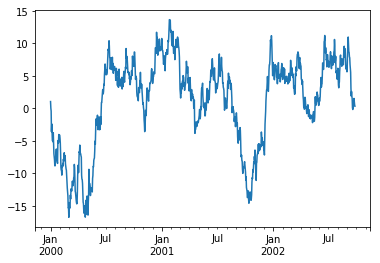

In [60]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()  #matplotlibを使ってグラフをプロット

<Figure size 432x288 with 0 Axes>

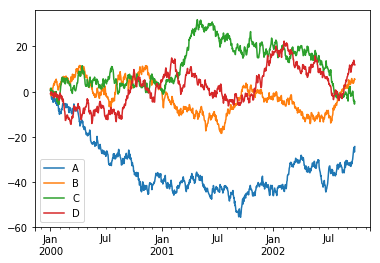

In [61]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
plt.figure(); df.plot(); plt.legend(loc='best')  #セミコロンは1行に複数の文を書く場合の記法(非推奨)
#plt.figure()…Figureオブジェクトの生成
#plt.legend()…図の中で利用する凡例(左下のもの)を表示するもの

### 13.他ファイルからのデータの取得

#### 13-1. CSV

In [62]:
df.to_csv('foo.csv')  #DataFrameをcsvに書き込み
pd.read_csv('foo.csv')  #CSVファイルをDataFrameで読み込む

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.587075,1.346920,0.725701,-0.889980
1,2000-01-02,0.025762,0.264161,0.203389,-0.904734
2,2000-01-03,-1.011816,-1.755280,1.620847,-0.591833
3,2000-01-04,-2.279414,-1.192146,0.935685,0.030528
4,2000-01-05,-3.293899,-1.178664,0.370845,-1.315633
5,2000-01-06,-2.667877,-1.517468,-0.327099,-0.459230
6,2000-01-07,-2.657866,-0.855833,-0.262645,-0.624239
7,2000-01-08,-2.991903,0.185000,-0.755474,-1.767696
8,2000-01-09,-4.271579,1.832426,0.388105,-0.837633
9,2000-01-10,-4.680879,2.012922,-1.309038,-1.406791


#### 13-2. HDF5
* HDF5…Hierarchical Data Formatの略…階層化されたデータ群を取り扱うフォーマット

#### 13-3. Excel

### pandasのメソッド等
* `Series()`…一次元配列のSeriesオブジェクトを生成。
  * `Series.shift(n)`…n個データを移動させるメソッド
  * `Series.str.lower()` …文字列を小文字に変換するメソッド
  * `Series.resample()`…引数に合致する時間インデックスでデータを再取得 -> Seriesオブジェクト
  * `Series.tz_localize(timezone)`…引数のタイムゾーン情報を持つ時間オブジェクトに変更
  * `Seriestime.tz_convert(timezone)`…引数のタイムゾーンの時間に変更
  * `Seriestime.to_period()`…Datatimeインデックスをperiodタイムインデックスに変更
  * `Seriestime.to_timestamp()`…月初日基準のdatetimeインデックスに変更
  * `Series.index`…シリーズオブジェクトのインデックス
  * `Series.cat.categories`…新しいカテゴリーの割り当て
  * `Series.cat.set_categories()`…新しいカテゴリーの割り当て
  * `Series.sort_values(category)`…指定したカテゴリーでのソート
  * `Series.plot()`…matplotlibを用いてグラフにプロット
* `date_range()`…固定されたデートタイムインデックスを返すメソッド。return -> DatetimeIndex型
  * 引数:start=開始日(str型 or datetime型), end=終了日(str型 or datetime型), periods=期間(int型), frequency=時間の頻度
* `DataFrame()`…二次元配列のDataFrameオブジェクトを生成。
  * 引数:data=データ(numpyオブジェクト,dict型,DataFrame型), index=インデックス(index型)
  * `DataFrame.dtypes`…データタイプを返す属性
  * `DataFrame.index`…インデックスを返す属性
  * `DataFrame.values`…DataFrameのバリューをカラム単位で返す属性
  * `DataFrame.columns`…カラムを返す属性
  * `DataFrame.T`…rowとcolumnsを転置して返す属性。transpose()でも代替可
  * `DataFrame.loc`…ラベルに沿ったrowやcolumnにアクセスする属性
    * 設定の仕方: `DataFrame.loc[row:column]`rowを指定しない場合はコロン(:)を入力
  * `DataFrame.iloc`…int型で取得するあ隊を指定できる属性。設定形式はlocと同じ
  * `DataFrame.at`…単一の値を取得できる属性。設定形式はlocと同じ
  * `DataFrame.iat`…`DataFrame.at`のint版
  * `DataFrame.head(n)`…最初のn列目までの情報を返す(デフォルトは5)。
  * `DataFrame.tail(n)`…最後からのn列目までの情報を返す(デフォルトは5)。
  * `DataFrame.describe()`…データの統計サマリーを返す
  * `DataFrame.sort_index()`…インデックス値でソート
    * 引数: axis=軸(0がrow、1がカラム), ascending=昇順か降順か
  * `DataFrame.sort_values()`…バリュー値でソート
    * 引数: by=基準点
  * `DataFrame.copy()`…DataFrameオブジェクトのコピーを作成
  * `DataFrame.reindex()`…インデックスの再割り当て
  * `DataFrame.dropna()`…欠損値を除外するメソッド
    * 引数:how="any"or"all"(any->1つでも欠損値があればそのrowかcolumnを除外。allは全て欠損値の場合)
  * `DataFrame.fillna()`…欠損値を補充するメソッド
  * `DataFrame.isna()`…そのマスが欠損地下道かをbool式(True or False)で表すメソッド
    * 引数: value=補充する値
  * `DataFrame.mean()`…平均を返すメソッド
    + 引数: axis=軸(デフォルトでインデックス(0),カラムも可(1))
  * `DataFrame.sub(s)`…データフレームと他の要素xとの減算(df-x)
    * 通常は肩を揃える必要があるが、pandasが自動で行ってくれる
  * `DataFrame.apply()`…DataFrameに関数を適用するメソッド。軸に添いSeriesと皆して適用する
  * `DataFrame.appen()`…DataFrameにrowを付加するメソッド。
    * 引数: ignore_index=付加するrowのラベルを使用するかどうか(Trueなら使用しない)
  * `DataFrame.groupby()` …グループごとに沿った対応をするメソッド -> Gruoupby型
    * `GroupBy.sum()`…グループに沿って合計を出すメソッド
    * `GroupBy.size()`…特定グループのサイズを集計
  * `DataFrame.stacked()`…カラムをインデックス相当に置き換え、マルチインデックスのようにするメソッド
  * `stucked DataFrame.unstacked()`…スタックされたDataFrameをカラムのある状態にするメソッド
  * `DataFrame.astype()`…pandasオブジェクトを特定のデータ型に変換
  * `DataFrame.to_csv()`…DataFrameをCSVに書き込み
  * `DataFrame.to_hdf()`…HDF5ファイルへの書き込み
  * `DataFrame.to_excel()`…Excelファイルへの書き込み
* `Panel()`…三次元配列のPanelを取り扱う。
* `Timestamp`()…pandas用のタイムスタンプを生成。pythonのdatetime型を変換することもできる。 -> Timestamp型
* `Categorical()`…カテゴリー変数を表すメソッド。 -> Categorical型
* `concat()`…データを結合させるメソッド
* `merge()`…DataFrameオブジェクトを結合させる
  * 引数: left,right=DataFrameオブジェクト、on=結合の基準をインデックスかカラムかを指定
* `MultiIndex.from_tuples()`…タプルのリストをマルチインデックスに変換する
* `pivot_table()`…スプレッドシートスタイルのピボットテーブル(データの要約)を返す
* `period_range()`…期間表示のタイムインデックスを返すメソッド -> PeriodIndex型
  * `PeriodIndex.asfreq()`…PeriodIndexオブジェクトを特定のタイムインデックスに変換
* `read_csv()`…csvをDataFrameとして読み込み
* `read_hdf5()`…HDF5ファイルの読み込み
* `read_excel()`…Excelファイルの読み込み

### numpyのメソッド等
* `randam.randn`()…標準正規分布に沿って乱数を生成する。 -> ndarray型
  * 引数:データ配列の次元に合わせて指定する(row, column...)
* `randam.randint()`…一分布に沿った整数をランダムを返す
* `array()`…一次元配列を作るメソッド。 -> ndarray型
* `cumsum()`…累積和を表すメソッド

### matplotlibのメソッド等
* Artistクラス…図のキャンバスをレンダリングするための抽象的な基底クラス
* Figureインスタンス…コールバックをサポートする
* `plt.figure()`…figureモジュール。プロットするすべての要素を含む、Artistクラスやfigureインスタンスを提供する
* `plt.legend()`…Legendモジュール。判例を表示させるためのもの。
  * 引数: loc=凡例の位置の指定